In [5]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np
# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

import pickle

In [6]:
#Read in reduced institutional data 
na_vals = ['Na', 'NaN', 'PrivacySuppressed']
df = pd.read_csv('../data/reduced_inst_data.csv', na_values=na_vals)

In [7]:
df.head()

,Unnamed: 0,UNITID,INSTNM,CITY,STABBR,ACCREDAGENCY,CONTROL,COSTT4_A,COSTT4_P,TUITIONFEE_IN,...,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN
0,0,100654,Alabama A & M University,Normal,AL,Southern Association of Colleges and Schools C...,1,22489.0,NaN,9744.0,...,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,16421.0
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,Southern Association of Colleges and Schools C...,1,24347.0,NaN,8568.0,...,15250.0,14000.0,15000.0,16000.0,17500.0,12500.0,15000.0,15000.0,15104.0,15000.0
2,2,100690,Amridge University,Montgomery,AL,Southern Association of Colleges and Schools C...,2,17680.0,NaN,6900.0,...,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,Southern Association of Colleges and Schools C...,1,23441.0,NaN,10714.0,...,14750.0,12500.0,12750.0,18569.0,17014.0,11899.0,15250.0,13333.0,14943.0,13102.0
4,4,100724,Alabama State University,Montgomery,AL,Southern Association of Colleges and Schools C...,1,21476.0,NaN,11068.0,...,18500.0,18246.0,17500.0,23925.0,19056.0,12000.0,19500.0,15525.0,19000.0,17500.0


In [8]:
df.shape

(6806, 26)

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ACCREDAGENCY,CONTROL,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,...,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN
0,100654,Alabama A & M University,Normal,AL,Southern Association of Colleges and Schools C...,1,22489.0,NaN,9744.0,18354.0,...,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,16421.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,Southern Association of Colleges and Schools C...,1,24347.0,NaN,8568.0,19704.0,...,15250.0,14000.0,15000.0,16000.0,17500.0,12500.0,15000.0,15000.0,15104.0,15000.0
2,100690,Amridge University,Montgomery,AL,Southern Association of Colleges and Schools C...,2,17680.0,NaN,6900.0,6900.0,...,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,Southern Association of Colleges and Schools C...,1,23441.0,NaN,10714.0,22362.0,...,14750.0,12500.0,12750.0,18569.0,17014.0,11899.0,15250.0,13333.0,14943.0,13102.0
4,100724,Alabama State University,Montgomery,AL,Southern Association of Colleges and Schools C...,1,21476.0,NaN,11068.0,19396.0,...,18500.0,18246.0,17500.0,23925.0,19056.0,12000.0,19500.0,15525.0,19000.0,17500.0


In [11]:
df.duplicated().value_counts()

False    6806
dtype: int64

In [12]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.isna().sum()

UNITID                     0
INSTNM                     0
CITY                       0
STABBR                     0
ACCREDAGENCY             354
CONTROL                    0
COSTT4_A                3375
COSTT4_P                4631
TUITIONFEE_IN           2941
TUITIONFEE_OUT          3185
PFTFAC                  3183
PCTPELL                  792
GRAD_DEBT_MDN           1499
WDRAW_DEBT_MDN          1650
LO_INC_DEBT_MDN         1586
MD_INC_DEBT_MDN         2360
HI_INC_DEBT_MDN         2366
DEP_DEBT_MDN            1762
IND_DEBT_MDN            1762
PELL_DEBT_MDN           1960
NOPELL_DEBT_MDN         1960
FEMALE_DEBT_MDN         2204
MALE_DEBT_MDN           2204
FIRSTGEN_DEBT_MDN       2063
NOTFIRSTGEN_DEBT_MDN    2063
dtype: int64

In [14]:
df.dtypes

UNITID                    int64
INSTNM                   object
CITY                     object
STABBR                   object
ACCREDAGENCY             object
CONTROL                   int64
COSTT4_A                float64
COSTT4_P                float64
TUITIONFEE_IN           float64
TUITIONFEE_OUT          float64
PFTFAC                  float64
PCTPELL                 float64
GRAD_DEBT_MDN           float64
WDRAW_DEBT_MDN          float64
LO_INC_DEBT_MDN         float64
MD_INC_DEBT_MDN         float64
HI_INC_DEBT_MDN         float64
DEP_DEBT_MDN            float64
IND_DEBT_MDN            float64
PELL_DEBT_MDN           float64
NOPELL_DEBT_MDN         float64
FEMALE_DEBT_MDN         float64
MALE_DEBT_MDN           float64
FIRSTGEN_DEBT_MDN       float64
NOTFIRSTGEN_DEBT_MDN    float64
dtype: object

### Turn object types into pandas categories 

In [15]:
# Identify columns with dtype string, excluding INSTNM which will not be used in the model 
categoricals = []
for label, content in df.items(): 
    if pd.api.types.is_string_dtype(content):
        if label != 'INSTNM': 
            print(label)
            categoricals.append(label)

CITY
STABBR
ACCREDAGENCY


In [16]:
#Turn string values into category values 
for label, content in df.items(): 
    if pd.api.types.is_string_dtype(content): 
        if label != 'INSTNM': 
            df[label] = content.astype('category').cat.as_ordered()

In [17]:
#Check that object columns changed to categories 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6806 entries, 0 to 6805
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   UNITID                6806 non-null   int64   
 1   INSTNM                6806 non-null   object  
 2   CITY                  6806 non-null   category
 3   STABBR                6806 non-null   category
 4   ACCREDAGENCY          6452 non-null   category
 5   CONTROL               6806 non-null   int64   
 6   COSTT4_A              3431 non-null   float64 
 7   COSTT4_P              2175 non-null   float64 
 8   TUITIONFEE_IN         3865 non-null   float64 
 9   TUITIONFEE_OUT        3621 non-null   float64 
 10  PFTFAC                3623 non-null   float64 
 11  PCTPELL               6014 non-null   float64 
 12  GRAD_DEBT_MDN         5307 non-null   float64 
 13  WDRAW_DEBT_MDN        5156 non-null   float64 
 14  LO_INC_DEBT_MDN       5220 non-null   float64 
 15  MD_I

In [18]:
df.CITY.cat.categories

Index(['ARTESIA', 'Aberdeen', 'Abilene', 'Abingdon', 'Abington', 'Ada',
       'Addison', 'Adelphi', 'Adelphia', 'Adrian',
       ...
       'Yuba City', 'Yucaipa', 'Yucca Valley', 'Yukon', 'Yuma', 'Zanesville',
       'Zebulon', 'greenacres', 'memphis', 'white plains'],
      dtype='object', length=2456)

In [19]:
df.CITY.cat.codes.sort_values()

5256       0
3609       1
3164       1
3162       1
5839       2
        ... 
2672    2451
6790    2452
5943    2453
5851    2454
5585    2455
Length: 6806, dtype: int16

### Handle null values in categorical columns 

In [20]:
# Check for nulls in categorical columns
df[categoricals].isna().sum()

CITY              0
STABBR            0
ACCREDAGENCY    354
dtype: int64

In [21]:
# drop columns nulls ACCREDAGENCY 
df.dropna(subset=['ACCREDAGENCY'], inplace=True)

In [22]:
df.shape

(6452, 25)

In [23]:
df[categoricals].isna().sum()

CITY            0
STABBR          0
ACCREDAGENCY    0
dtype: int64

In [24]:
df.to_csv('../data/reduced_inst_data_with_cats.csv', index=False)

### Save Category Codes into dataframe and then csv to be accessed later 

In [25]:
cats = pd.Categorical(df['CITY']).categories

In [26]:
cats

Index(['ARTESIA', 'Aberdeen', 'Abilene', 'Abingdon', 'Abington', 'Ada',
       'Addison', 'Adelphi', 'Adelphia', 'Adrian',
       ...
       'Yuba City', 'Yucaipa', 'Yucca Valley', 'Yukon', 'Yuma', 'Zanesville',
       'Zebulon', 'greenacres', 'memphis', 'white plains'],
      dtype='object', length=2456)

In [27]:
pd.Categorical(cats).codes

array([   0,    1,    2, ..., 2453, 2454, 2455], dtype=int16)

In [28]:
# Function to create dataframes containing each categories/codes set 
def create_codes_df(col, df): 
    df_tmp = pd.DataFrame()
    # Create column in category codes df with the categories
    df_tmp[col] = pd.Categorical(df[col]).categories
    # Create column in category codes df with the matching codes 
    df_tmp[col+'_code'] = pd.Categorical(df_tmp[col]).codes 
    return df_tmp 

In [29]:
city_cat_codes = create_codes_df('CITY', df)
city_cat_codes

,CITY,CITY_code
0,ARTESIA,0
1,Aberdeen,1
2,Abilene,2
3,Abingdon,3
4,Abington,4
...,...,...
2451,Zanesville,2451
2452,Zebulon,2452
2453,greenacres,2453
2454,memphis,2454


In [30]:
stabbr_cat_codes = create_codes_df('STABBR', df)
accred_cat_codes = create_codes_df('ACCREDAGENCY', df)

In [31]:
# Save cat codes to csv files for later reference 
stabbr_cat_codes.to_csv('./stabbr_cat_codes.csv', index=False)
city_cat_codes.to_csv('./city_cat_codes.csv', index=False)
accred_cat_codes.to_csv('./accred_cat_codes.csv', index=False)

### Turn categorical columns into numbers 

In [32]:
for label, content in df.items(): 
    if not pd.api.types.is_numeric_dtype(content): 
        df[label] = pd.Categorical(content).codes

In [33]:
# check that categories are now ints 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6452 entries, 0 to 6805
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNITID                6452 non-null   int64  
 1   INSTNM                6452 non-null   int16  
 2   CITY                  6452 non-null   int16  
 3   STABBR                6452 non-null   int8   
 4   ACCREDAGENCY          6452 non-null   int8   
 5   CONTROL               6452 non-null   int64  
 6   COSTT4_A              3359 non-null   float64
 7   COSTT4_P              2009 non-null   float64
 8   TUITIONFEE_IN         3741 non-null   float64
 9   TUITIONFEE_OUT        3523 non-null   float64
 10  PFTFAC                3576 non-null   float64
 11  PCTPELL               5723 non-null   float64
 12  GRAD_DEBT_MDN         5043 non-null   float64
 13  WDRAW_DEBT_MDN        4902 non-null   float64
 14  LO_INC_DEBT_MDN       4969 non-null   float64
 15  MD_INC_DEBT_MDN      

### Split data into train and test sets

In [34]:
df.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'ACCREDAGENCY', 'CONTROL',
       'COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PFTFAC',
       'PCTPELL', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN',
       'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN',
       'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN',
       'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN'],
      dtype='object')

In [35]:
# Select predictor features 
selected_features = ['UNITID', 'CITY', 'STABBR', 'ACCREDAGENCY', 'CONTROL', 'COSTT4_A', 'COSTT4_P',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PFTFAC', 'PCTPELL']

In [36]:
target = 'GRAD_DEBT_MDN'

In [37]:
df[target]

0       33375.0
1       22500.0
2       27334.0
3       21607.0
4       32000.0
         ...   
6801     9371.0
6802     9371.0
6803    12125.0
6804    21000.0
6805        NaN
Name: GRAD_DEBT_MDN, Length: 6452, dtype: float64

In [38]:
#Define X and y variables 
X = df[selected_features]
y = df[target]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [40]:
X_train

,UNITID,CITY,STABBR,ACCREDAGENCY,CONTROL,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,PFTFAC,PCTPELL
5834,483382,450,39,4,3,NaN,16637.0,NaN,NaN,NaN,0.5563
4549,434496,1433,47,26,3,NaN,15451.0,NaN,NaN,NaN,0.5882
4626,439668,2194,4,3,3,NaN,NaN,NaN,NaN,NaN,0.3048
5468,461342,1739,51,26,3,NaN,20265.0,NaN,NaN,NaN,0.4885
409,121275,1880,5,3,3,33180.0,NaN,17235.0,17235.0,0.4211,0.5281
...,...,...,...,...,...,...,...,...,...,...,...
991,148098,1031,17,26,3,NaN,17370.0,NaN,NaN,NaN,0.3607
1717,174473,2158,27,20,1,15066.0,NaN,5549.0,5549.0,0.5528,0.3015
3423,228769,77,50,38,1,21633.0,NaN,10496.0,26533.0,0.5675,0.3609
1738,175120,1352,27,16,2,NaN,15306.0,NaN,NaN,NaN,0.5753


### Fill in missing Numerical data in test set and training set separately 

In [41]:
X_train.isna().sum()

UNITID               0
CITY                 0
STABBR               0
ACCREDAGENCY         0
CONTROL              0
COSTT4_A          2466
COSTT4_P          3578
TUITIONFEE_IN     2158
TUITIONFEE_OUT    2336
PFTFAC            2301
PCTPELL            600
dtype: int64

In [42]:
X_na = []
for label, content in X_train.items(): 
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum(): 
            print(label)
            X_na.append(label)

COSTT4_A
COSTT4_P
TUITIONFEE_IN
TUITIONFEE_OUT
PFTFAC
PCTPELL


In [43]:
# Fill nulls in X numeric columns with median, add column indicating if value was missing 
for label, content in X_train.items(): 
    if label in X_na:  
        #Add column that has true if row had missing value for the column 
        X_train[label+'_is_missing'] = pd.isnull(content) 
        # Fill missing values for median for the column 
        X_train[label] = content.fillna(content.median())

<ipython-input-43-ef68476bce50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[label+'_is_missing'] = pd.isnull(content)
<ipython-input-43-ef68476bce50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[label] = content.fillna(content.median())
<ipython-input-43-ef68476bce50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [44]:
X_train.isna().sum()

UNITID                       0
CITY                         0
STABBR                       0
ACCREDAGENCY                 0
CONTROL                      0
COSTT4_A                     0
COSTT4_P                     0
TUITIONFEE_IN                0
TUITIONFEE_OUT               0
PFTFAC                       0
PCTPELL                      0
COSTT4_A_is_missing          0
COSTT4_P_is_missing          0
TUITIONFEE_IN_is_missing     0
TUITIONFEE_OUT_is_missing    0
PFTFAC_is_missing            0
PCTPELL_is_missing           0
dtype: int64

In [45]:
X_test.isna().sum()

UNITID              0
CITY                0
STABBR              0
ACCREDAGENCY        0
CONTROL             0
COSTT4_A          627
COSTT4_P          865
TUITIONFEE_IN     553
TUITIONFEE_OUT    593
PFTFAC            575
PCTPELL           129
dtype: int64

In [46]:
# Do the same for X_test 
def fill_na(dataframe): 
    for label, content in dataframe.items(): 
        if pd.isnull(content).sum():  
            #Add column that has true if row had missing value for the column 
            dataframe[label+'_is_missing'] = pd.isnull(content) 
            # Fill missing values for median for the column 
            dataframe[label] = content.fillna(content.median())

In [47]:
fill_na(X_test)

<ipython-input-46-c1472fc2007d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[label+'_is_missing'] = pd.isnull(content)
<ipython-input-46-c1472fc2007d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[label] = content.fillna(content.median())
<ipython-input-46-c1472fc2007d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [48]:
X_test.isna().sum()

UNITID                       0
CITY                         0
STABBR                       0
ACCREDAGENCY                 0
CONTROL                      0
COSTT4_A                     0
COSTT4_P                     0
TUITIONFEE_IN                0
TUITIONFEE_OUT               0
PFTFAC                       0
PCTPELL                      0
COSTT4_A_is_missing          0
COSTT4_P_is_missing          0
TUITIONFEE_IN_is_missing     0
TUITIONFEE_OUT_is_missing    0
PFTFAC_is_missing            0
PCTPELL_is_missing           0
dtype: int64

In [49]:
# fill na in y_train and y_test 
y_train.fillna(y_train.median(), inplace=True)

In [50]:
y_train.isna().sum()

0

In [51]:
X_test.isna().sum()

UNITID                       0
CITY                         0
STABBR                       0
ACCREDAGENCY                 0
CONTROL                      0
COSTT4_A                     0
COSTT4_P                     0
TUITIONFEE_IN                0
TUITIONFEE_OUT               0
PFTFAC                       0
PCTPELL                      0
COSTT4_A_is_missing          0
COSTT4_P_is_missing          0
TUITIONFEE_IN_is_missing     0
TUITIONFEE_OUT_is_missing    0
PFTFAC_is_missing            0
PCTPELL_is_missing           0
dtype: int64

In [52]:
y_test.fillna(y_test.median(), inplace=True)

In [53]:
y_test.isna().sum()

0

## Build and Train model 

In [54]:
model = RandomForestRegressor()

In [55]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = model.predict(X_test)

In [57]:
r_squared = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('R-Squared Score: ', r_squared)
print('Mean Absolute Error: ', mae)

R-Squared Score:  0.7352458705930416
Mean Absolute Error:  2653.0885243996904


In [61]:
importances = model.feature_importances_
importances

array([8.61212367e-02, 3.44014430e-02, 2.91107192e-02, 9.51094890e-02,
       1.44514660e-02, 4.43055543e-02, 1.58769419e-02, 4.62919791e-01,
       9.83001061e-02, 3.32843782e-02, 5.76073458e-02, 1.20425414e-03,
       2.16149526e-02, 3.88351061e-04, 3.58843063e-04, 3.49674024e-03,
       1.44838819e-03])

In [66]:
X_train.columns

Index(['UNITID', 'CITY', 'STABBR', 'ACCREDAGENCY', 'CONTROL', 'COSTT4_A',
       'COSTT4_P', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PFTFAC', 'PCTPELL',
       'COSTT4_A_is_missing', 'COSTT4_P_is_missing',
       'TUITIONFEE_IN_is_missing', 'TUITIONFEE_OUT_is_missing',
       'PFTFAC_is_missing', 'PCTPELL_is_missing'],
      dtype='object')

In [76]:
feature_imp = pd.Series(importances*100, index=X_train.columns).sort_values(ascending=False)

In [77]:
feature_imp

TUITIONFEE_IN                46.291979
TUITIONFEE_OUT                9.830011
ACCREDAGENCY                  9.510949
UNITID                        8.612124
PCTPELL                       5.760735
COSTT4_A                      4.430555
CITY                          3.440144
PFTFAC                        3.328438
STABBR                        2.911072
COSTT4_P_is_missing           2.161495
COSTT4_P                      1.587694
CONTROL                       1.445147
PFTFAC_is_missing             0.349674
PCTPELL_is_missing            0.144839
COSTT4_A_is_missing           0.120425
TUITIONFEE_IN_is_missing      0.038835
TUITIONFEE_OUT_is_missing     0.035884
dtype: float64

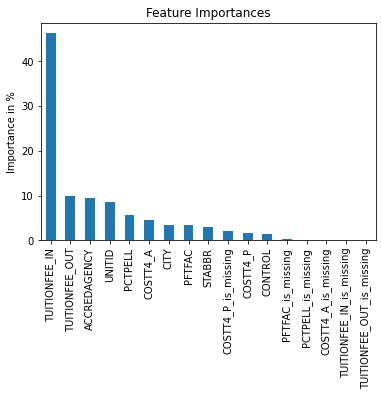

In [79]:
fig, ax = plt.subplots()
feature_imp.plot.bar()
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Importance in %")
# fig.tight_layout()
plt.show()

### Pickle model 

In [58]:
file_name = 'rf_regressor1.pkl'
pickle.dump(model, open(file_name, 'wb'))

### Load Pickled Model